## Especialización **[Machine Learning & Deep Learning](https://dmc.pe/producto/especializacion-en-machine-learning-dl/)**
<hr>

## Aprendizaje Supervisado - Regresion

### Conjunto de datos
Boston Housing Dataset https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html



Importamos librerias

In [ ]:
import pandas as pd
import numpy as np
import sklearn

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt

In [ ]:
# Preprocesar label
from sklearn import preprocessing
# Estandarizamos los datos
from sklearn.preprocessing import StandardScaler
# Normalizando los datos
from sklearn.preprocessing import MinMaxScaler

Funciones auxiliares para graficar resultados de  regresión

In [ ]:
def plot_regression_line(data, columna, target, modelo):
    '''
    dibuja un scatter plot entre la columna y el target de data
    y también la línea de regresión del modelo entregado

    params:
    data: conjunnto de datos
    columna: nombre de la variable explicativa
    target: nombre de la variable de respuesta
    modelo: modelo entrenado
    '''

    minimo = data[columna].min()
    maximo = data[columna].max()
    linear_space = np.arange(minimo, maximo, 0.1)

    sns.scatterplot(data = data, x = columna, y = target)
    plt.plot(linear_space, modelo.predict(linear_space.reshape(-1,1)), 'r')

def plot_polinomial_line(data, columna, target, poli_transformer, modelo):
    '''
    dibuja un scatter plot entre la columna y el target de data,
    aplica la transformación polinomial indicada en poli_transformer
    y grafica la línea de regresión del modelo polinomial entregado

    params:
    data: conjunnto de datos
    columna: nombre de la variable explicativa
    target: nombre de la variable de respuesta
    poli_transformer: transformador polinomial entrenado
    modelo: modelo entrenado
    '''

    minimo = data[columna].min()
    maximo = data[columna].max()
    linear_space = np.arange(minimo, maximo, 0.1).reshape(-1,1)

    sns.scatterplot(data = data, x = columna, y = target)
    plt.plot(linear_space, modelo.predict(poli_transformer.transform(linear_space)), 'r')


Lectura de archivos

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df_salary = pd.read_csv('salary.csv')

In [ ]:
df_salary['salary'] = df_salary['salary'].replace(['<=50K', '>50K'], [0,1], regex = True)

In [ ]:
df_salary.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  salary  
0          2174             0              40   United-States       0  
1             0             0              13   United-States       0  
2             0             0              40   United-States       0  
3             0             0              40   United-States       0  
4             0             0              40            Cuba       0

In [ ]:
df_salary_categoric=df_salary[['workclass','education','marital-status','occupation','relationship','race','sex','native-country']]
df_salary_categoric_dummies=pd.get_dummies(df_salary_categoric)

In [ ]:
df_salary_numeric=df_salary[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','salary']]

In [ ]:
df_salary=pd.concat([df_salary_categoric_dummies, df_salary_numeric], axis=1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(df_salary)
normalized = scaler.transform(df_salary)
df_salary = pd.DataFrame(normalized,columns=list(df_salary.columns))

In [ ]:
df_salary.head()

workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0           0.0                     0.0                   0.0   
1           0.0                     0.0                   0.0   
2           0.0                     0.0                   0.0   
3           0.0                     0.0                   0.0   
4           0.0                     0.0                   0.0   

   workclass_ Never-worked  workclass_ Private  workclass_ Self-emp-inc  \
0                      0.0                 0.0                      0.0   
1                      0.0                 0.0                      0.0   
2                      0.0                 1.0                      0.0   
3                      0.0                 1.0                      0.0   
4                      0.0                 1.0                      0.0   

   workclass_ Self-emp-not-inc  workclass_ State-gov  workclass_ Without-pay  \
0                          0.0                   1.0                     0.0   
1                          1.0                   0.0                     0.0   
2                          0.0                   0.0                     0.0   
3                          0.0                   0.0                     0.0   
4                          0.0                   0.0                     0.0   

   education_ 10th  ...  native-country_ United-States  \
0              0.0  ...                            1.0   
1              0.0  ...                            1.0   
2              0.0  ...                            1.0   
3              0.0  ...                            1.0   
4              0.0  ...                            0.0   

   native-country_ Vietnam  native-country_ Yugoslavia       age    fnlwgt  \
0                      0.0                         0.0  0.301370  0.044302   
1                      0.0                         0.0  0.452055  0.048238   
2                      0.0                         0.0  0.287671  0.138113   
3                      0.0                         0.0  0.493151  0.151068   
4                      0.0                         0.0  0.150685  0.221488   

   education-num  capital-gain  capital-loss  hours-per-week  salary  
0       0.800000       0.02174           0.0        0.397959     0.0  
1       0.800000       0.00000           0.0        0.122449     0.0  
2       0.533333       0.00000           0.0        0.397959     0.0  
3       0.400000       0.00000           0.0        0.397959     0.0  
4       0.800000       0.00000           0.0        0.397959     0.0  

[5 rows x 109 columns]

In [ ]:
df_salary.shape

(32561, 109)

In [ ]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 109 entries, workclass_ ? to salary
dtypes: float64(109)
memory usage: 27.1 MB


In [ ]:
target = 'salary'

### división en train y test

La función `train_test_split` nos permite dividir la data de forma aleatoria en conjuntos de entrenamiento y prueba para poder entrenar nuestro modelo

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_test_split(df_salary, test_size = 0.20, random_state = 0)

[       workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
 15282           0.0                     0.0                   0.0   
 24870           0.0                     0.0                   0.0   
 18822           0.0                     0.0                   0.0   
 26404           0.0                     0.0                   0.0   
 7842            0.0                     0.0                   0.0   
 ...             ...                     ...                   ...   
 13123           0.0                     0.0                   1.0   
 19648           0.0                     0.0                   0.0   
 9845            0.0                     0.0                   0.0   
 10799           0.0                     0.0                   1.0   
 2732            0.0                     0.0                   0.0   
 
        workclass_ Never-worked  workclass_ Private  workclass_ Self-emp-inc  \
 15282                      0.0                 1.0                      0.0  

In [ ]:
df_train, df_test = train_test_split(df_salary, test_size = 0.20, random_state = 0)

In [ ]:
df_train.shape

(26048, 109)

In [ ]:
df_test.shape

(6513, 109)

In [ ]:
df_train.head()

workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
15282           0.0                     0.0                   0.0   
24870           0.0                     0.0                   0.0   
18822           0.0                     0.0                   0.0   
26404           0.0                     0.0                   0.0   
7842            0.0                     0.0                   0.0   

       workclass_ Never-worked  workclass_ Private  workclass_ Self-emp-inc  \
15282                      0.0                 1.0                      0.0   
24870                      0.0                 1.0                      0.0   
18822                      0.0                 1.0                      0.0   
26404                      0.0                 1.0                      0.0   
7842                       0.0                 0.0                      0.0   

       workclass_ Self-emp-not-inc  workclass_ State-gov  \
15282                          0.0                   0.0   
24870                          0.0                   0.0   
18822                          0.0                   0.0   
26404                          0.0                   0.0   
7842                           1.0                   0.0   

       workclass_ Without-pay  education_ 10th  ...  \
15282                     0.0              0.0  ...   
24870                     0.0              0.0  ...   
18822                     0.0              0.0  ...   
26404                     0.0              0.0  ...   
7842                      0.0              0.0  ...   

       native-country_ United-States  native-country_ Vietnam  \
15282                            1.0                      0.0   
24870                            1.0                      0.0   
18822                            1.0                      0.0   
26404                            1.0                      0.0   
7842                             1.0                      0.0   

       native-country_ Yugoslavia       age    fnlwgt  education-num  \
15282                         0.0  0.260274  0.110039       0.400000   
24870                         0.0  0.246575  0.126266       0.533333   
18822                         0.0  0.287671  0.027627       0.800000   
26404                         0.0  0.452055  0.085563       0.533333   
7842                          0.0  0.698630  0.071052       0.666667   

       capital-gain  capital-loss  hours-per-week  salary  
15282           0.0      0.000000        0.397959     0.0  
24870           0.0      0.000000        0.540816     0.0  
18822           0.0      0.000000        0.500000     0.0  
26404           0.0      0.000000        0.397959     0.0  
7842            0.0      0.493343        0.397959     0.0  

[5 rows x 109 columns]

In [ ]:
df_test.head()

workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
22278           0.0                     0.0                   0.0   
8950            0.0                     0.0                   0.0   
7838            0.0                     0.0                   0.0   
16505           0.0                     0.0                   0.0   
19140           0.0                     0.0                   0.0   

       workclass_ Never-worked  workclass_ Private  workclass_ Self-emp-inc  \
22278                      0.0                 1.0                      0.0   
8950                       0.0                 1.0                      0.0   
7838                       0.0                 1.0                      0.0   
16505                      0.0                 1.0                      0.0   
19140                      0.0                 1.0                      0.0   

       workclass_ Self-emp-not-inc  workclass_ State-gov  \
22278                          0.0                   0.0   
8950                           0.0                   0.0   
7838                           0.0                   0.0   
16505                          0.0                   0.0   
19140                          0.0                   0.0   

       workclass_ Without-pay  education_ 10th  ...  \
22278                     0.0              0.0  ...   
8950                      0.0              0.0  ...   
7838                      0.0              0.0  ...   
16505                     0.0              0.0  ...   
19140                     0.0              0.0  ...   

       native-country_ United-States  native-country_ Vietnam  \
22278                            1.0                      0.0   
8950                             1.0                      0.0   
7838                             1.0                      0.0   
16505                            1.0                      0.0   
19140                            1.0                      0.0   

       native-country_ Yugoslavia       age    fnlwgt  education-num  \
22278                         0.0  0.136986  0.111948       0.600000   
8950                          0.0  0.136986  0.138681       0.800000   
7838                          0.0  0.109589  0.165699       0.733333   
16505                         0.0  0.397260  0.091927       0.133333   
19140                         0.0  0.383562  0.109029       0.400000   

       capital-gain  capital-loss  hours-per-week  salary  
22278           0.0      0.000000        0.438776     0.0  
8950            0.0      0.000000        0.397959     0.0  
7838            0.0      0.000000        0.397959     0.0  
16505           0.0      0.436639        0.397959     0.0  
19140           0.0      0.648301        0.765306     1.0  

[5 rows x 109 columns]

In [ ]:
target

'salary'

In [ ]:
X_train = df_train.drop(target, axis = 1)
y_train = df_train[target]

In [ ]:
X_train

workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
15282           0.0                     0.0                   0.0   
24870           0.0                     0.0                   0.0   
18822           0.0                     0.0                   0.0   
26404           0.0                     0.0                   0.0   
7842            0.0                     0.0                   0.0   
...             ...                     ...                   ...   
13123           0.0                     0.0                   1.0   
19648           0.0                     0.0                   0.0   
9845            0.0                     0.0                   0.0   
10799           0.0                     0.0                   1.0   
2732            0.0                     0.0                   0.0   

       workclass_ Never-worked  workclass_ Private  workclass_ Self-emp-inc  \
15282                      0.0                 1.0                      0.0   
24870                      0.0                 1.0                      0.0   
18822                      0.0                 1.0                      0.0   
26404                      0.0                 1.0                      0.0   
7842                       0.0                 0.0                      0.0   
...                        ...                 ...                      ...   
13123                      0.0                 0.0                      0.0   
19648                      0.0                 1.0                      0.0   
9845                       0.0                 1.0                      0.0   
10799                      0.0                 0.0                      0.0   
2732                       0.0                 1.0                      0.0   

       workclass_ Self-emp-not-inc  workclass_ State-gov  \
15282                          0.0                   0.0   
24870                          0.0                   0.0   
18822                          0.0                   0.0   
26404                          0.0                   0.0   
7842                           1.0                   0.0   
...                            ...                   ...   
13123                          0.0                   0.0   
19648                          0.0                   0.0   
9845                           0.0                   0.0   
10799                          0.0                   0.0   
2732                           0.0                   0.0   

       workclass_ Without-pay  education_ 10th  ...  \
15282                     0.0              0.0  ...   
24870                     0.0              0.0  ...   
18822                     0.0              0.0  ...   
26404                     0.0              0.0  ...   
7842                      0.0              0.0  ...   
...                       ...              ...  ...   
13123                     0.0              0.0  ...   
19648                     0.0              1.0  ...   
9845                      0.0              0.0  ...   
10799                     0.0              0.0  ...   
2732                      0.0              0.0  ...   

       native-country_ Trinadad&Tobago  native-country_ United-States  \
15282                              0.0                            1.0   
24870                              0.0                            1.0   
18822                              0.0                            1.0   
26404                              0.0                            1.0   
7842                               0.0                            1.0   
...                                ...                            ...   
13123                              0.0                            1.0   
19648                              0.0                            1.0   
9845                               0.0                            1.0   
10799                              0.0                            1.0   
2732                               0.0      

In [ ]:
X_test = df_test.drop(target, axis = 1)
y_test = df_test[target]

In [ ]:
X_train.shape, y_train.shape

((26048, 108), (26048,))

In [ ]:
X_test.shape, y_test.shape

((6513, 108), (6513,))

## 1. Regresión lineal simple

Elegimos una variable que tenga una relación aparentemente lineal con el target

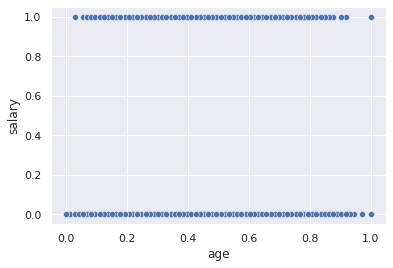

In [ ]:
sns.scatterplot(data = df_train, x = "age", y = target)

In [ ]:
df_train[['age', target]].corr()

age    salary
age     1.000000  0.233217
salary  0.233217  1.000000

importamos el modelo utilizando la librería `scikit-learn`

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr

LinearRegression()

In [ ]:
# modelo.fit(X, y)

In [ ]:
lr.fit(X_train[['age']], y_train)

LinearRegression()

In [ ]:
lr.coef_

array([0.53337622])

In [ ]:
lr.intercept_

0.08211690678538189

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


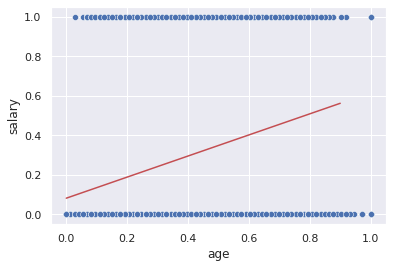

In [ ]:
plot_regression_line(df_train, 'age', target, lr)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


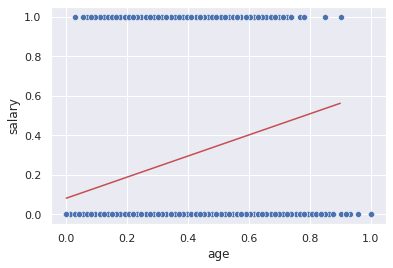

In [ ]:
plot_regression_line(df_test, 'age', target, lr)

### evaluación de regresión con MSE y RMSE

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

obtenemos las predicciones del modelo para poder evaluarlas respecto a el target original

In [ ]:
y_train_pred = lr.predict(X_train[['age']])
y_test_pred = lr.predict(X_test[['age']])

In [ ]:
y_train_pred[:10], y_train[:10]

(array([0.22094085, 0.21363433, 0.2355539 , 0.32323218, 0.45474961,
        0.33053871, 0.1405691 , 0.09672995, 0.20632781, 0.13326257]),
 15282    0.0
 24870    0.0
 18822    0.0
 26404    0.0
 7842     0.0
 4890     0.0
 3243     0.0
 17470    0.0
 14211    0.0
 22453    0.0
 Name: salary, dtype: float64)

In [ ]:
#El df de entrenamientiento tiene poco menos de error que el testeo
print('MSE train:', mean_squared_error(y_train, y_train_pred))
print('MSE test:', mean_squared_error(y_test, y_test_pred))

MSE train: 0.17237501282585457
MSE test: 0.17453871776031052


In [ ]:
print('RMSE train:', mean_squared_error(y_train, y_train_pred) ** 0.5)
print('RMSE test:', mean_squared_error(y_test, y_test_pred) ** 0.5)

RMSE train: 0.4151806990044872
RMSE test: 0.41777831173998314


In [ ]:
print('R2 train:', r2_score(y_train, y_train_pred))
print('R2 test:', r2_score(y_test, y_test_pred))

R2 train: 0.0543900314820166
R2 test: 0.05614620647357571


## 2. Regresión Múltiple

Utilizamos todas las variables para la predicción

In [ ]:
X_train.head()

workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
15282           0.0                     0.0                   0.0   
24870           0.0                     0.0                   0.0   
18822           0.0                     0.0                   0.0   
26404           0.0                     0.0                   0.0   
7842            0.0                     0.0                   0.0   

       workclass_ Never-worked  workclass_ Private  workclass_ Self-emp-inc  \
15282                      0.0                 1.0                      0.0   
24870                      0.0                 1.0                      0.0   
18822                      0.0                 1.0                      0.0   
26404                      0.0                 1.0                      0.0   
7842                       0.0                 0.0                      0.0   

       workclass_ Self-emp-not-inc  workclass_ State-gov  \
15282                          0.0                   0.0   
24870                          0.0                   0.0   
18822                          0.0                   0.0   
26404                          0.0                   0.0   
7842                           1.0                   0.0   

       workclass_ Without-pay  education_ 10th  ...  \
15282                     0.0              0.0  ...   
24870                     0.0              0.0  ...   
18822                     0.0              0.0  ...   
26404                     0.0              0.0  ...   
7842                      0.0              0.0  ...   

       native-country_ Trinadad&Tobago  native-country_ United-States  \
15282                              0.0                            1.0   
24870                              0.0                            1.0   
18822                              0.0                            1.0   
26404                              0.0                            1.0   
7842                               0.0                            1.0   

       native-country_ Vietnam  native-country_ Yugoslavia       age  \
15282                      0.0                         0.0  0.260274   
24870                      0.0                         0.0  0.246575   
18822                      0.0                         0.0  0.287671   
26404                      0.0                         0.0  0.452055   
7842                       0.0                         0.0  0.698630   

         fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  
15282  0.110039       0.400000           0.0      0.000000        0.397959  
24870  0.126266       0.533333           0.0      0.000000        0.540816  
18822  0.027627       0.800000           0.0      0.000000        0.500000  
26404  0.085563       0.533333           0.0      0.000000        0.397959  
7842   0.071052       0.666667           0.0      0.493343        0.397959  

[5 rows x 108 columns]

In [ ]:
y_train.head()

15282    0.0
24870    0.0
18822    0.0
26404    0.0
7842     0.0
Name: salary, dtype: float64

In [ ]:
lr_multiple = LinearRegression()

In [ ]:
lr_multiple.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = lr_multiple.predict(X_train)
y_test_pred = lr_multiple.predict(X_test)

In [ ]:
#De la misma manera el df de entrenamientiento tiene poco menos de error que el testeo
print('RMSE train:', mean_squared_error(y_train, y_train_pred) ** 0.5)
print('RMSE test:', mean_squared_error(y_test, y_test_pred) ** 0.5)

RMSE train: 0.3388601721908334
RMSE test: 0.3435415644828877


In [ ]:
print('R2 train:', r2_score(y_train, y_train_pred))
print('R2 test:', r2_score(y_test, y_test_pred))

R2 train: 0.3700895913056048
R2 test: 0.3617783642202381


## 3. Árbol de Regresión

In [ ]:
# sklearn -> TODOS LOS DATOS DEBEN SER NUMEROS SIN NULOS
# sklearn.metrics -> Numeros y sin nulos

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [ ]:
# Ajuste del arbol de decision al dataset
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [ ]:
arb_regressor = DecisionTreeRegressor()
arb_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_train_pred = arb_regressor.predict(X_train)
y_test_pred = arb_regressor.predict(X_test)

In [ ]:
print('RMSE train:', mean_squared_error(y_train, y_train_pred) ** 0.5)
print('RMSE test:', mean_squared_error(y_test, y_test_pred) ** 0.5)

RMSE train: 0.0
RMSE test: 0.4347488955480564


In [ ]:
print('R2 train:', r2_score(y_train, y_train_pred))
print('R2 test:', r2_score(y_test, y_test_pred))

R2 train: 1.0
R2 test: -0.022091835889146205


Una funcionalidad interesante que tienen los arboles de decision en `sklearn` es que se pueden visualizar

In [ ]:
from sklearn.tree import plot_tree

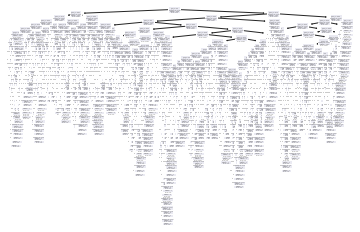

In [ ]:
_ = plot_tree(arb_regressor)

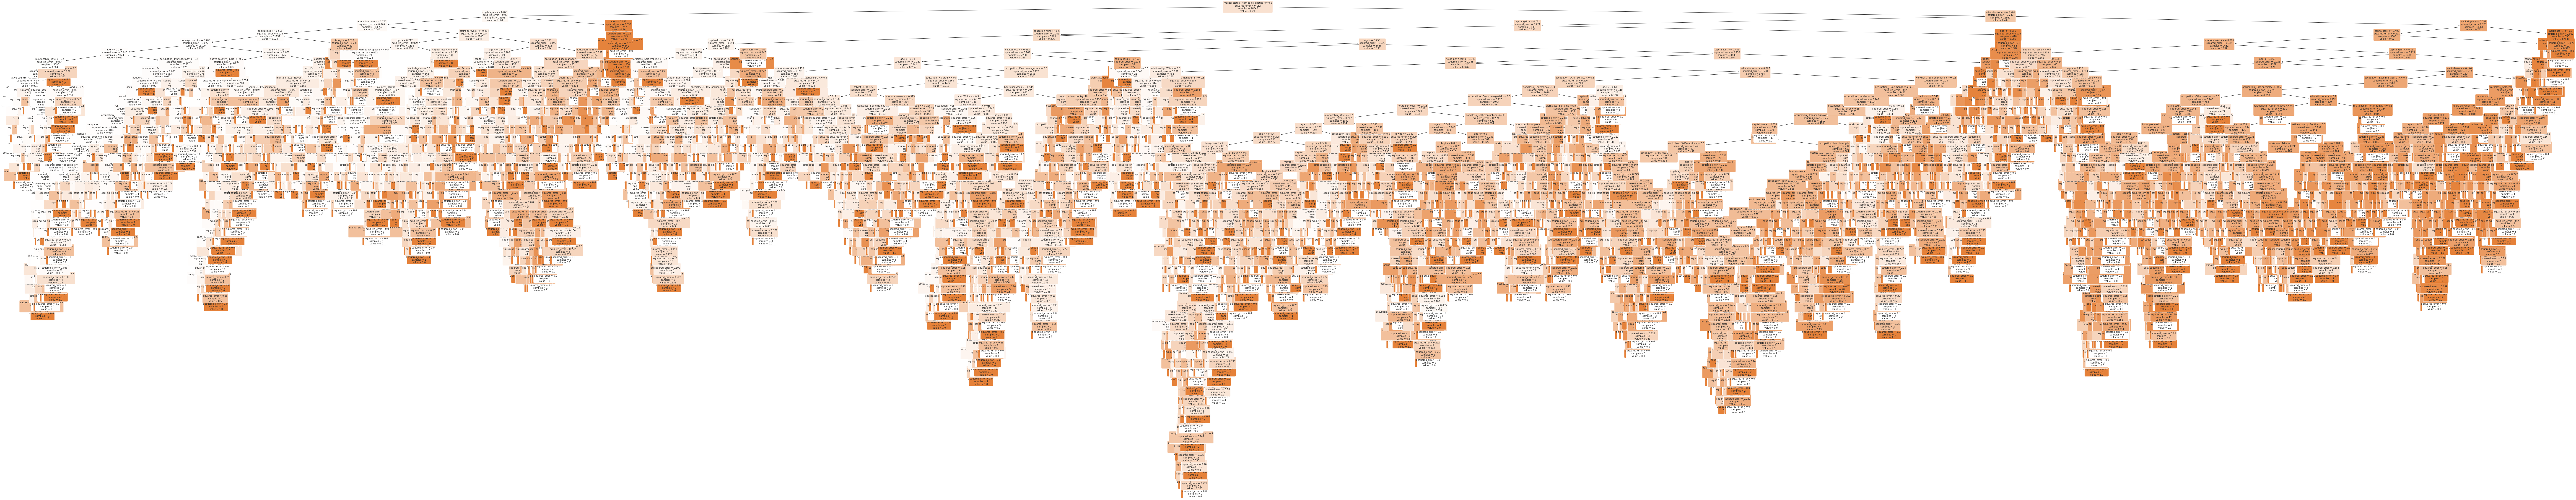

In [ ]:
plt.figure(figsize=(200,40))

_ = plot_tree(arb_regressor, fontsize= 10, feature_names = X_train.columns, rounded = True, filled = True)

### Parámetros

#### Profundidad

In [ ]:
arb_regressor = DecisionTreeRegressor(max_depth= 4)
arb_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [ ]:
y_train_pred = arb_regressor.predict(X_train)
y_test_pred = arb_regressor.predict(X_test)

In [ ]:
print('RMSE train:', mean_squared_error(y_train, y_train_pred) ** 0.5)
print('RMSE test:', mean_squared_error(y_test, y_test_pred) ** 0.5)

RMSE train: 0.3301694126421518
RMSE test: 0.33039037977263686


In [ ]:
print('R2 train:', r2_score(y_train, y_train_pred))
print('R2 test:', r2_score(y_test, y_test_pred))

R2 train: 0.40445933832892933
R2 test: 0.39993674650475664


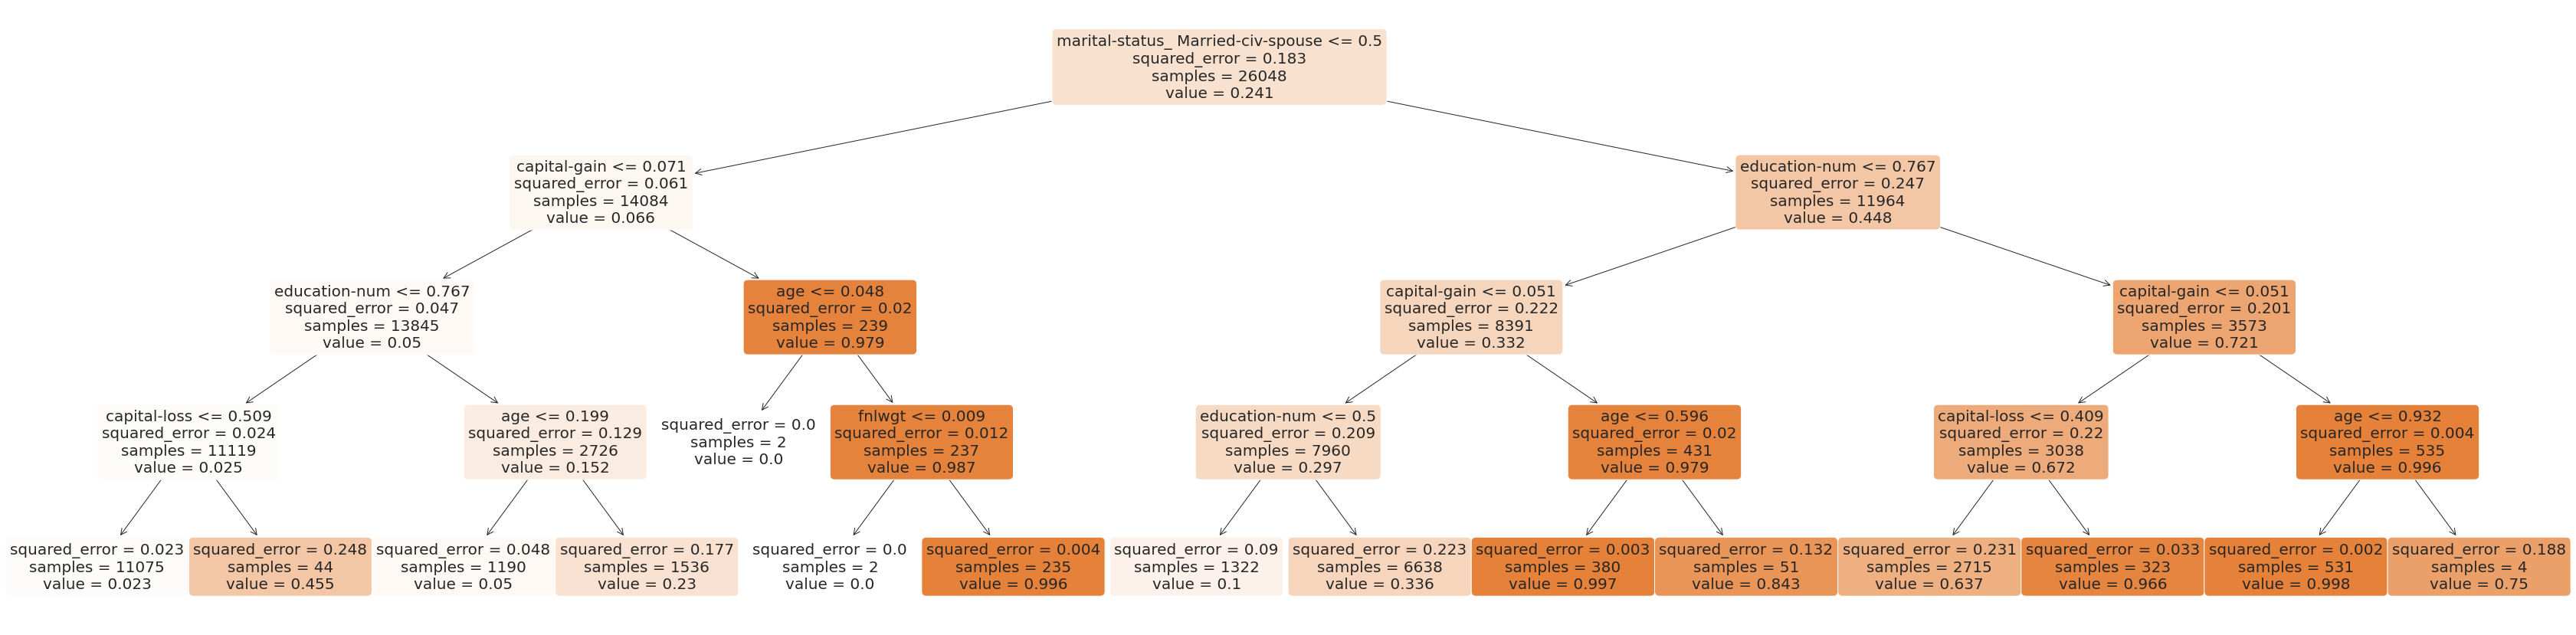

In [ ]:
plt.figure(figsize=(60,15))

_ = plot_tree(arb_regressor, fontsize= 20, feature_names = X_train.columns, rounded = True, filled = True)

*Mínimo* de muestras para split

In [ ]:
arb_regressor = DecisionTreeRegressor(min_samples_split= 100)
arb_regressor.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_split=100)

In [ ]:
y_train_pred = arb_regressor.predict(X_train)
y_test_pred = arb_regressor.predict(X_test)

In [ ]:
print('RMSE train:', mean_squared_error(y_train, y_train_pred) ** 0.5)
print('RMSE test:', mean_squared_error(y_test, y_test_pred) ** 0.5)

RMSE train: 0.28383222916171824
RMSE test: 0.3268102547154373


In [ ]:
print('R2 train:', r2_score(y_train, y_train_pred))
print('R2 test:', r2_score(y_test, y_test_pred))

R2 train: 0.5598900765591334
R2 test: 0.41287091211389615


## 4. Regresión logística

In [ ]:
from sklearn.linear_model import LogisticRegression

Cargamos metrics del sklearn para obtener las princiaples métricas de evaluación del modelo

In [ ]:
from sklearn import metrics

In [ ]:
estimador_logis = LogisticRegression() # Definir el algoritmo o modelo
estimador_logis.fit(X_train, y_train) # Entrenar el modelo / Ajustar el modelo a los datos

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predicciones = estimador_logis.predict(X_test)

predicciones[:10]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
predicciones_probabilidades = estimador_logis.predict_proba(X_test)
predicciones_probabilidades[:10]

array([[0.97262596, 0.02737404],
       [0.93809744, 0.06190256],
       [0.64771842, 0.35228158],
       [0.82687136, 0.17312864],
       [0.6884295 , 0.3115705 ],
       [0.44842915, 0.55157085],
       [0.98750528, 0.01249472],
       [0.95599736, 0.04400264],
       [0.82906487, 0.17093513],
       [0.99545828, 0.00454172]])

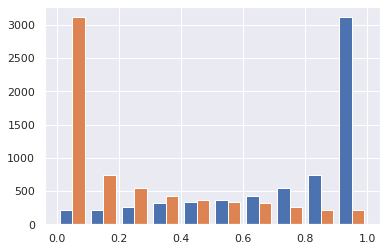

In [ ]:
plt.hist(predicciones_probabilidades);

In [ ]:
probs_df = pd.DataFrame(predicciones_probabilidades)

In [ ]:
df_resultados = X_test.reset_index().copy()
df_resultados["objetivo"] = y_test.tolist()
df_resultados["prediccion"] = predicciones
df_resultados = pd.concat([df_resultados, probs_df], axis=1)
df_resultados[["objetivo", "prediccion", 0, 1]].head(10)

objetivo  prediccion         0         1
0       0.0         0.0  0.972626  0.027374
1       0.0         0.0  0.938097  0.061903
2       0.0         0.0  0.647718  0.352282
3       0.0         0.0  0.826871  0.173129
4       1.0         0.0  0.688429  0.311571
5       0.0         1.0  0.448429  0.551571
6       0.0         0.0  0.987505  0.012495
7       0.0         0.0  0.955997  0.044003
8       1.0         0.0  0.829065  0.170935
9       0.0         0.0  0.995458  0.004542

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicciones)

array([[4551,  367],
       [ 641,  954]])

In [ ]:
df = pd.DataFrame({"clase_real":y_test,
                   "clase_pred": predicciones,
                   "probabilidades_0":estimador_logis.predict_proba(X_test)[:,0],
                    "probabilidades_1":estimador_logis.predict_proba(X_test)[:,1],
                  })
df["sum_probas"] = df.probabilidades_0 + df.probabilidades_1

In [ ]:
df.sample(10)
#df.head(10)

clase_real  clase_pred  probabilidades_0  probabilidades_1  sum_probas
4043          0.0         0.0          0.984613          0.015387         1.0
10489         0.0         1.0          0.052904          0.947096         1.0
25457         0.0         0.0          0.590077          0.409923         1.0
2161          0.0         0.0          0.994438          0.005562         1.0
8484          0.0         0.0          0.971202          0.028798         1.0
16241         1.0         1.0          0.438654          0.561346         1.0
14154         1.0         0.0          0.788922          0.211078         1.0
30048         0.0         0.0          0.915217          0.084783         1.0
18502         0.0         0.0          0.947090          0.052910         1.0
20796         0.0         0.0          0.975394          0.024606         1.0

In [ ]:
df.query("probabilidades_1>0.4 & clase_pred==0").head(10)

clase_real  clase_pred  probabilidades_0  probabilidades_1  sum_probas
4763          1.0         0.0          0.573513          0.426487         1.0
2794          0.0         0.0          0.531723          0.468277         1.0
28343         0.0         0.0          0.502023          0.497977         1.0
5566          1.0         0.0          0.552206          0.447794         1.0
11612         1.0         0.0          0.558902          0.441098         1.0
14629         1.0         0.0          0.563544          0.436456         1.0
28522         1.0         0.0          0.548848          0.451152         1.0
23949         0.0         0.0          0.569771          0.430229         1.0
12338         1.0         0.0          0.566627          0.433373         1.0
27736         1.0         0.0          0.508447          0.491553         1.0

In [ ]:
df.query("probabilidades_1<=0.55 & clase_pred==1")

clase_real  clase_pred  probabilidades_0  probabilidades_1  sum_probas
281           1.0         1.0          0.495149          0.504851         1.0
20147         1.0         1.0          0.470272          0.529728         1.0
3468          1.0         1.0          0.457877          0.542123         1.0
5189          0.0         1.0          0.496223          0.503777         1.0
15902         0.0         1.0          0.459800          0.540200         1.0
...           ...         ...               ...               ...         ...
3599          1.0         1.0          0.481503          0.518497         1.0
15791         0.0         1.0          0.487725          0.512275         1.0
8780          0.0         1.0          0.472542          0.527458         1.0
10313         0.0         1.0          0.486362          0.513638         1.0
31726         0.0         1.0          0.465935          0.534065         1.0

[170 rows x 5 columns]

In [ ]:
def probabilidades_a_clases(predicciones_probabilidades, umbral=0.5):
    predicciones = np.zeros([len(predicciones_probabilidades), ])
    predicciones[predicciones_probabilidades[:,1]>=umbral] = 1
    return predicciones

In [ ]:
predicciones_probabilidades[:10]

array([[0.97262596, 0.02737404],
       [0.93809744, 0.06190256],
       [0.64771842, 0.35228158],
       [0.82687136, 0.17312864],
       [0.6884295 , 0.3115705 ],
       [0.44842915, 0.55157085],
       [0.98750528, 0.01249472],
       [0.95599736, 0.04400264],
       [0.82906487, 0.17093513],
       [0.99545828, 0.00454172]])

In [ ]:
probabilidades_a_clases(predicciones_probabilidades, umbral=0.40)[:10]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
pred_1 = probabilidades_a_clases(predicciones_probabilidades, umbral=0.30)
confusion_matrix(y_test, pred_1)

array([[4080,  838],
       [ 319, 1276]])

In [ ]:
predicciones_en_umbral = probabilidades_a_clases(predicciones_probabilidades, 0.8)

In [ ]:
sensibilidad_umbral = metrics.recall_score(y_test, predicciones_en_umbral)
sensibilidad_umbral

0.23385579937304074

In [ ]:
precision_umbral = metrics.average_precision_score(y_test, predicciones_en_umbral)
precision_umbral

0.39680511780390415

In [ ]:
from ipywidgets import widgets, fixed, interact
@interact(umbral=widgets.FloatSlider(min=0.001, max=0.999, step=0.001, value=0.001))
def evaluar_umbral(umbral):
    predicciones_en_umbral = probabilidades_a_clases(predicciones_probabilidades, umbral)
    sensibilidad_umbral = metrics.recall_score(y_test, predicciones_en_umbral)
    precision_umbral = metrics.average_precision_score(y_test, predicciones_en_umbral)
    exactitud_umbral = metrics.accuracy_score(y_test, predicciones_en_umbral)
    roc_auc = metrics.roc_auc_score(y_test, predicciones_en_umbral)
    mc_umbral = confusion_matrix(y_test, predicciones_en_umbral)
    print( """
    Precision: {:.3f}
    Sensibilidad:{:.3f}
    Exacitud:{:.3f}
    Area_ROC:{:.3F}
    """.format(
        precision_umbral,
        sensibilidad_umbral,
        exactitud_umbral,
        roc_auc
    ))
    print("Matriz de confusión")
    print(mc_umbral)

interactive(children=(FloatSlider(value=0.001, description='umbral', max=0.999, min=0.001, step=0.001), Output…

In [ ]:
def evaluar_umbral(umbral):
    predicciones_en_umbral = probabilidades_a_clases(predicciones_probabilidades, umbral)
    precision_umbral =  metrics.average_precision_score(y_test, predicciones_en_umbral)
    sensibilidad_umbral = metrics.recall_score(y_test, predicciones_en_umbral)
    return precision_umbral, sensibilidad_umbral


rango_umbral = np.linspace(0., 1., 1000)
sensibilidad_umbrales = []
precision_umbrales = []

for umbral in rango_umbral:
    precision_umbral, sensibilidad_umbral = evaluar_umbral(umbral)
    precision_umbrales.append(precision_umbral)
    sensibilidad_umbrales.append(sensibilidad_umbral)

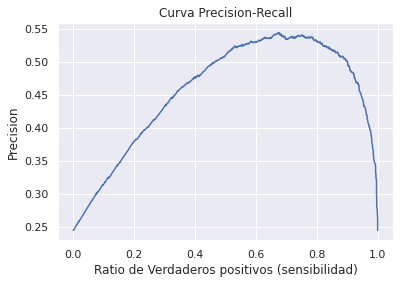

In [ ]:
plt.plot(sensibilidad_umbrales, precision_umbrales);
plt.ylabel("Precision")
plt.xlabel("Ratio de Verdaderos positivos (sensibilidad)")
plt.title("Curva Precision-Recall");

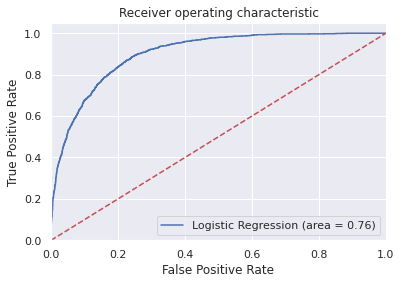

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, estimador_logis.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, estimador_logis.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
def evaluar_modelo(clases_reales, predicciones, probabilidades):
    exactitud = metrics.accuracy_score(clases_reales, predicciones)
    precision = metrics.average_precision_score(clases_reales, predicciones)
    sensibilidad = metrics.recall_score(clases_reales, predicciones)
    roc_auc = metrics.roc_auc_score(clases_reales, predicciones)
    f1 = metrics.f1_score(clases_reales, predicciones)
    print("""
    Exactitud: {:.3f}
    Precisión: {:.3f}
    Sensibilidad: {:.3f}
    Area bajo curva (AUC): {:.3f}
    Puntuación F1: {:.3f}
    """.format(
        exactitud,
        precision,
        sensibilidad,
        roc_auc,
        f1
    ))

evaluar_modelo(y_test, predicciones, predicciones_probabilidades)


    Exactitud: 0.845
    Precisión: 0.530
    Sensibilidad: 0.598
    Area bajo curva (AUC): 0.762
    Puntuación F1: 0.654
    


In [ ]:
def tupla_clase_prediccion(y_real, y_pred):
    return list(zip(y_real, y_pred))

tupla_clase_prediccion(y_test, predicciones)[:10]

[(0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 0.0),
 (0.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 0.0),
 (0.0, 0.0)]

**Conceptos de Clasificación binaria**

En clasificación binaria, tenemos el concepto de casos negativos (clase 0, en el caso del dataset de cancer de mama serian los casos donde el cancer es benigno) y casos positivos (clase 1, en el caso del dataset de cancer de mama serían los casos donde el cancer es maligno). Positivo y negativo no significa que el resultado sea bueno o malo, simplemente que la detección de un cancer maligno se active o no.

- Casos positivos: Casos donde la clase es 1 (cánceres malignos)
- Casos negativos: Casos donde la clase es 0 (cánceres benignos)

Esto nos lleva a computar 4 tipos de observaciones, explicados como ejemplos del dataset del cancer de mama.

- Verdaderos Positivos(True positives), serían las imágenes con un cancer maligno que se detectan como cancer maligno.
- Falsos Positivos (False positives), serían los cánceres benignos que se detectan como un cancer maligno.
- Verdaderos Negativos(True Negatives), serían los canceres benignos que se clasifican como cánceres benignos.
- Falsos Negativos(False Negatives), serían los canceres malignos que se clasifican como cánceres benignos.

In [ ]:
predicciones = estimador_logis.predict(X_test)
clases_reales = y_test
predicciones_probabilidades = estimador_logis.predict_proba(X_test)

In [ ]:
def tupla_clase_prediccion(y_real, y_pred):
    return list(zip(y_real, y_pred))

tupla_clase_prediccion(clases_reales, predicciones)[:10]

[(0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 0.0),
 (0.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 0.0),
 (0.0, 0.0)]

In [ ]:
def VP(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==1 and obs[1]==1])

def VN(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==0 and obs[1]==0])

def FP(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==0 and obs[1]==1])

def FN(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==1 and obs[1]==0])


print("""
Verdaderos Positivos: {}
Verdaderos Negativos: {}
Falsos Positivos: {}
Falsos Negativos: {}
""".format(
    VP(clases_reales, predicciones),
    VN(clases_reales, predicciones),
    FP(clases_reales, predicciones),
    FN(clases_reales, predicciones)
))


Verdaderos Positivos: 954
Verdaderos Negativos: 4551
Falsos Positivos: 367
Falsos Negativos: 641



### Ratios de clasificación

**Exactitud (Accuracy)**

La exactitud es una medida general de como se comporta el modelo, mide simplemente el porcentaje de casos que se han clasificado correctamente.

$$Exactitud=\frac{Número~de~observaciones~correctamente~clasificadas}{Número~de~observaciones~totales}= \frac{VP+VN}{VP+VN+FP+FN}$$

In [ ]:
def exactitud(clases_reales, predicciones):
    vp = VP(clases_reales, predicciones)
    vn = VN(clases_reales, predicciones)
    return (vp+vn) / len(clases_reales)

exactitud(clases_reales, predicciones)

0.8452326116996776

In [ ]:
from sklearn import metrics
metrics.accuracy_score(clases_reales, predicciones)

0.8452326116996776

**Precisión (Precission)**

La precisión indica la habilidad del modelo para clasificar como positivos los casos que son positivos.

$$Precisión=\frac{Número~de~observaciones~positivas~correctamente~clasificadas}{Número~de~observaciones~clasificadas~como~positivas}= \frac{VP}{VP+FP}$$

In [ ]:
def precision(clases_reales, predicciones):
    vp = VP(clases_reales, predicciones)
    fn = FN(clases_reales, predicciones)
    return vp / (vp+fn)

precision(clases_reales, predicciones)

0.5981191222570533

In [ ]:
def precision(clases_reales, predicciones):
    vp = VP(clases_reales, predicciones)
    fp = FP(clases_reales, predicciones)
    return vp / (vp+fp)

precision(clases_reales, predicciones)

0.7221801665404997

In [ ]:
metrics.precision_score(clases_reales, predicciones)

0.7221801665404997

**Exhaustividad o sensibilidad(Recall o True Positive Rate)**

La sensibilidad nos da una medida de la habilidad del modelo para encontrar todos los casos positivos. La sensibilidad se mide en función de una clase.

$$Sensibilidad=\frac{Número~de~observaciones~positivas~clasificadas~como~positivas}{Número~de~observaciones~positivas~totales}= \frac{VP}{VP+FN}$$

In [ ]:
def sensibilidad(clases_reales, predicciones):
    vp = VP(clases_reales, predicciones)
    fn = FN(clases_reales, predicciones)
    return vp / (vp+fn)

sensibilidad(clases_reales, predicciones)

0.5981191222570533

In [ ]:
metrics.recall_score(clases_reales, predicciones)

0.5981191222570533

**Especificidad**

La especificidad nos da una medida de la habilidad del modelo para encontrar todos los casos negativos. La especificidad se mide en función de una clase.

$$Especificidad=\frac{Número~de~observaciones~negativas~clasificadas~como~negativas}{Número~de~observaciones~negativas~totales}= \frac{VN}{VN+FP}$$

In [ ]:
def especificidad(clases_reales, predicciones):
    vn = VN(clases_reales, predicciones)
    fp = FP(clases_reales, predicciones)
    return vn / (vn+fp)

especificidad(clases_reales, predicciones)

0.9253761691744612

In [ ]:
metrics.recall_score(clases_reales, predicciones)

0.5981191222570533

** Matriz de confusion **

La matriz de confusión es una forma muy sencilla de comparar como ha clasificado cada observación el modelo.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(clases_reales, predicciones)

array([[4551,  367],
       [ 641,  954]])

**Puntuación F1 (F1 score)**

La puntuación F1 es una media ponderada entre la sensibilidad (que intenta obtener cuantos mas verdaderos positivos independientemente de los falsos positivos) y la precisión (que intenta obtener solo verdaderos positivos que sean casos claros para limitar los falsos positivos).

La puntuación F1 se define como la media harmónica de la precisión y la sensibilidad:

$$F1=2*\frac{1}{\frac{1}{precisión}+\frac{1}{sensibilidad}}=2*\frac{precisión*sensibilidad}{precisión+sensibilidad}$$

In [ ]:
def puntuacion_f1(clases_reales, predicciones):
    precision_preds = precision(clases_reales, predicciones)
    sensibilidad_preds = sensibilidad(clases_reales, predicciones)
    return 2*(precision_preds*sensibilidad_preds)/(precision_preds+sensibilidad_preds)

puntuacion_f1(clases_reales, predicciones)

0.654320987654321

In [ ]:
metrics.f1_score(clases_reales, predicciones )

0.654320987654321

** Ratio de Falsos Positivos (Ratio de Falsa Alarma o FPR) **

El ratio de falsos positivos nos da una medida de las probabilidades de nuestro modelo de asignar una clase positiva a un caso negativo.

Se define como:

$$FPR=\frac{Número~de~observaciones~negativas~clasificadas~como~positivas}{Número~de~observaciones~totales}= \frac{FP}{FP+TN}$$

In [ ]:
def fpr(clases_reales, predicciones):
    return (FP(clases_reales, predicciones) / (
             FP(clases_reales, predicciones) + VN(clases_reales, predicciones)
             )
           )
fpr(clases_reales, predicciones)

0.07462383082553883

**¿Cómo clasifica un modelo?**

Un modelo como la regresión lineal funciona prediciendo distancias a una "linea de decision" que se convierten en probabilidades para cada clase. Pero a la hora de la verdad al modelo le suele interesar sólo saber que clase predice el modelo. En general esto se hace decidiendo un umbral *(threshold)* y clasificando los casos con menor probabilidad como clase negativa y  mayor probabilidad como clase positiva.

In [ ]:
df = pd.DataFrame({"clase_real":clases_reales,
                   "clase_pred": predicciones,
                   "probabilidades_0":estimador_logis.predict_proba(X_test)[:,0],
                    "probabilidades_1":estimador_logis.predict_proba(X_test)[:,1],
                  })
df["sum_probas"] = df.probabilidades_0 + df.probabilidades_1

In [ ]:
df.sample(10)

clase_real  clase_pred  probabilidades_0  probabilidades_1  sum_probas
26650         1.0         1.0          0.232101          0.767899         1.0
18604         0.0         0.0          0.962499          0.037501         1.0
17505         0.0         0.0          0.709796          0.290204         1.0
27414         0.0         0.0          0.986572          0.013428         1.0
7783          0.0         0.0          0.863906          0.136094         1.0
14904         0.0         0.0          0.859892          0.140108         1.0
27431         0.0         0.0          0.987948          0.012052         1.0
4775          0.0         0.0          0.975510          0.024490         1.0
31195         0.0         0.0          0.984852          0.015148         1.0
3046          0.0         0.0          0.906061          0.093939         1.0

Como el modelo no tiene ningún motivo para elegir un umbral determinado (sólo sabe probabilidades) elige 0.5 por defecto.

In [ ]:
df.query("probabilidades_1>0.5 & clase_pred==0")

Empty DataFrame
Columns: [clase_real, clase_pred, probabilidades_0, probabilidades_1, sum_probas]
Index: []

In [ ]:
df.query("probabilidades_0>0.5 & clase_pred==1")

Empty DataFrame
Columns: [clase_real, clase_pred, probabilidades_0, probabilidades_1, sum_probas]
Index: []

**Curva Precisión (Precission-Recall Curve)**

In [ ]:
def probabilidades_a_clases(predicciones_probabilidades, umbral=0.5):
    predicciones = np.zeros([len(predicciones_probabilidades), ])
    predicciones[predicciones_probabilidades[:,1]>=umbral] = 1
    return predicciones

In [ ]:
predicciones_probabilidades[:10]

array([[0.97262596, 0.02737404],
       [0.93809744, 0.06190256],
       [0.64771842, 0.35228158],
       [0.82687136, 0.17312864],
       [0.6884295 , 0.3115705 ],
       [0.44842915, 0.55157085],
       [0.98750528, 0.01249472],
       [0.95599736, 0.04400264],
       [0.82906487, 0.17093513],
       [0.99545828, 0.00454172]])

In [ ]:
probabilidades_a_clases(predicciones_probabilidades, umbral=0.90)[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
from ipywidgets import widgets, fixed, interact
@interact(umbral=widgets.FloatSlider(min=0.01, max=0.99, step=0.01, value=0.01))
def evaluar_umbral(umbral):
    predicciones_en_umbral = probabilidades_a_clases(predicciones_probabilidades, umbral)
    sensibilidad_umbral = metrics.recall_score(clases_reales, predicciones_en_umbral)
    fpr_umbral = fpr(clases_reales, predicciones_en_umbral)
    precision_umbral = precision(clases_reales, predicciones_en_umbral)
    print( """
    Precision: {:.3f}
    Sensibilidad:{:.3f}
    Ratio de Alarma: {:.3f}
    """.format(
        precision_umbral,
        sensibilidad_umbral,
        fpr_umbral
    ))

interactive(children=(FloatSlider(value=0.01, description='umbral', max=0.99, min=0.01, step=0.01), Output()),…

In [ ]:
def evaluar_umbral(umbral):
    predicciones_en_umbral = probabilidades_a_clases(predicciones_probabilidades, umbral)
    precision_umbral =  metrics.average_precision_score(y_test, predicciones_en_umbral)
    sensibilidad_umbral = metrics.recall_score(y_test, predicciones_en_umbral)
    return precision_umbral, sensibilidad_umbral


rango_umbral = np.linspace(0., 1., 1000)
sensibilidad_umbrales = []
precision_umbrales = []

for umbral in rango_umbral:
    precision_umbral, sensibilidad_umbral = evaluar_umbral(umbral)
    precision_umbrales.append(precision_umbral)
    sensibilidad_umbrales.append(sensibilidad_umbral)

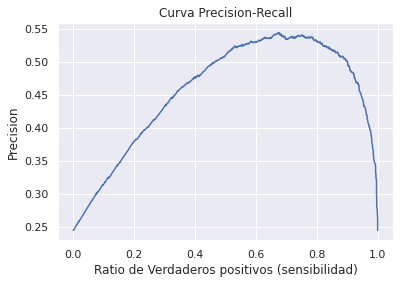

In [ ]:
plt.plot(sensibilidad_umbrales, precision_umbrales);
plt.ylabel("Precision")
plt.xlabel("Ratio de Verdaderos positivos (sensibilidad)")
plt.title("Curva Precision-Recall");

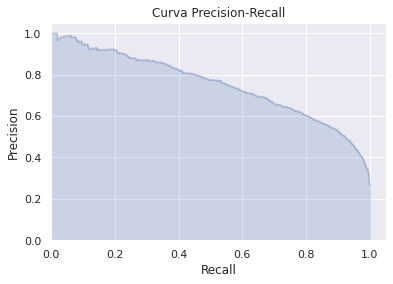

In [ ]:
def grafica_precision_recall(clases_reales, predicciones_probabilidades):
    precision_, recall_, _ = metrics.precision_recall_curve(
        clases_reales, predicciones_probabilidades[:,1])

    plt.step(recall_, precision_, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall_, precision_, step='post', alpha=0.2,
                 color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.05])
    plt.title('Curva Precision-Recall');
    plt.show()


grafica_precision_recall(clases_reales, predicciones_probabilidades)

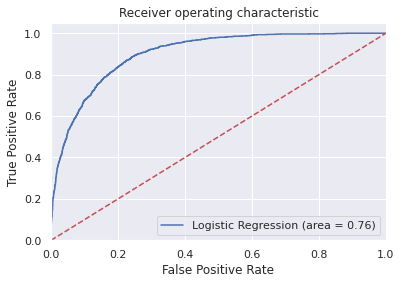

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, estimador_logis.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, estimador_logis.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
metrics.roc_auc_score(clases_reales, predicciones)

0.7617476457157574

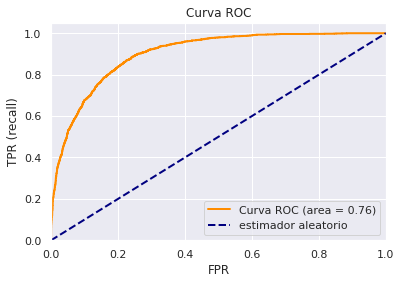

In [ ]:
def grafica_curva_auc(clases_reales, predicciones, predicciones_probabilidades):
    fpr, tpr, _ = metrics.roc_curve(clases_reales, predicciones_probabilidades[:,1])
    roc_auc = metrics.roc_auc_score(clases_reales, predicciones)
    plt.figure()

    plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="estimador aleatorio")

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR (recall)')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show();

grafica_curva_auc(clases_reales, predicciones, predicciones_probabilidades)

In [ ]:
def evaluar_modelo(clases_reales, predicciones, probabilidades):
    exactitud = metrics.accuracy_score(clases_reales, predicciones)
    precision = metrics.average_precision_score(clases_reales, predicciones)
    sensibilidad = metrics.recall_score(clases_reales, predicciones)
    roc_auc = metrics.roc_auc_score(clases_reales, predicciones)
    f1 = metrics.f1_score(clases_reales, predicciones)
    print("""
    Exactitud: {:.3f}
    Precisión: {:.3f}
    Sensibilidad: {:.3f}
    Area bajo curva (AUC): {:.3f}
    Puntuación F1: {:.3f}
    """.format(
        exactitud,
        precision,
        sensibilidad,
        roc_auc,
        f1
    ))

evaluar_modelo(clases_reales, predicciones, predicciones_probabilidades)


    Exactitud: 0.845
    Precisión: 0.530
    Sensibilidad: 0.598
    Area bajo curva (AUC): 0.762
    Puntuación F1: 0.654
    
